<h1 style="text-align: center;">Simulación y aplicaciones en ciencias sociales y experimentales
</h3>
<h3 style="text-align: center;"> Tema 2.3 Modelos compartimentales y en tiempo discreto </h3>
<h3 style="text-align: center;"> Ejercicios propuestos </h3>

## Ejercicio 1

Partimos del modelo *SIR*, asumiendo individuos homogéneos con red de contactos total. Las ecuaciones que rigen el modelo son 

$$\begin{aligned}
\frac{ds}{dt} &= -\beta s x  \\
\frac{dx}{dt} &= \beta s x - \gamma x\\
\frac{dr}{dt} &= \gamma x,
\end{aligned}$$ 

donde $s$, $x$, $r$ son el porcentaje de susceptibles, infectados y recuperados en la población. El parámetro $\beta$ es la tasa de contagio entre los contactos posibles y $\gamma = 1/T$, siendo $T$ la duración de la enfermedad. 

(desglosar x en x1, x2, x3,... en un periodo de 7 dias) hay que cambiar las variables en las funciones
Que variables necesitamos? Hay que contabilizar los enfermos de cada dia, por lo que necesitamos una variable para cada dia. Cada variable representa una ecuación diferencial. 
Comparar el calculo de infectados con Xdesagregado (suma de X1, X2,..,X7) y con Xagregado (X) en un periodo de 7 dias.

**Apartado 1.** Extender el modelo asumiendo que $T$ indica la duración exacta de la enfermedad, contabilizando los enfermos que llevan $d$ días desde que enfermaron, con $1<d \leq T$. Tomar como parámetros del modelo los utilizados en los ejercicios de clase. (a) Escribir las ecuaciones del modelo; (b) Comparar la evolución del número total de susceptibles, infectados y recuperados de este modelo extendido con el modelo original; (c) Representar gráficamente las diferencias entre las salidas de un modelo y otro (e.g, número total de infectados) en función de la duración de la enfermedad y otros parámetros.   

### Apartado 1:

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parámetros del modelo
re = 3         # numero de encuentros por día
ri = 0.1       # tasas de infección
T = 7          # duración de la enfermedad en días
beta = re*ri   # tasa de contacto por día
gamma = 1 / T  # tasa de recuperación

# Condiciones iniciales
s0 = 0.99  # fracción inicial de susceptibles
x0 = [0.01] + [0] * (T - 1)  # fracción inicial de infectados en cada día de infección (solo en x_1 hay infectados inicialmente)
r0 = 0     # fracción inicial de recuperados

# Vector inicial de estado
initial_conditions = [s0] + x0 + [r0]


# Sistema de ecuaciones diferenciales
def model(y, t, beta, gamma, T):
    s = y[0]  # susceptibles
    x = y[1:T+1]  # infectados en cada día de la enfermedad
    r = y[T+1]  # recuperados

    # Ecuación para los susceptibles
    ds_dt = -beta * s * sum(x)

    # Ecuaciones para los infectados en cada día d
    dx_dt = [0] * T
    dx_dt[0] = beta * s * sum(x) - x[0] / T  # Primer día de infección
    for d in range(1, T-1):
        dx_dt[d] = x[d-1] / T - x[d] / T  # Transición entre días de infección
    dx_dt[T-1] = x[T-2] / T - gamma * x[T-1]  # Último día de infección

    # Ecuación para los recuperados
    dr_dt = gamma * x[T-1]

    return [ds_dt] + dx_dt + [dr_dt]

# Tiempo de simulación
days = 160  # número de días a simular
t = np.linspace(0, days, days)

# Resolución del sistema de ecuaciones diferenciales
solution = odeint(model, initial_conditions, t, args=(beta, gamma, T))
s = solution[:, 0]
x = solution[:, 1:T+1]
r = solution[:, T+1]

# Gráfica de resultados
plt.figure(figsize=(10, 6))
plt.plot(t, s, label='Susceptibles')
plt.plot(t, np.sum(x, axis=1), label='Infectados (total)')
#for d in range(T):
    #plt.plot(t, x[:, d], label=f'Infectados día {d+1}')
plt.plot(t, r, label='Recuperados')
plt.xlabel('Días')
plt.ylabel('Fracción de la población')
plt.legend()
plt.title('Modelo SIR Extendido con Duración de Enfermedad T')
plt.show()


#### Diferencia entre el modelo con "X" agregado y desagregado:

Progresión de la Enfermedad: En el modelo desagregado, la progresión de la enfermedad se modela explícitamente, lo que permite una mayor acumulación de infectados en diferentes etapas de la enfermedad. Esto puede resultar en un mayor número total de infectados en cualquier momento dado.

Tasa de Recuperación: En el modelo agregado, la tasa de recuperación se aplica uniformemente a todos los infectados, lo que puede llevar a una recuperación más rápida y, por lo tanto, a una menor fracción de infectados en cualquier momento dado.

Interacción entre Subgrupos: En el modelo desagregado, la interacción entre diferentes subgrupos de infectados puede llevar a una mayor transmisión de la enfermedad, ya que los infectados en diferentes etapas pueden tener diferentes tasas de transmisión.

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parámetros del modelo
re = 3         # numero de encuentros por día
ri = 0.1       # tasas de infección
beta = re * ri # tasa de contacto por día
T = 7          # duración de la enfermedad en días
gamma = 1 / T  # tasa de recuperación

# Condiciones iniciales
s0 = 0.99  # fracción inicial de susceptibles
x0 = [0.01] + [0] * (T - 1)  # fracción inicial de infectados en cada día de infección (solo en x_1 hay infectados inicialmente)
r0 = 0     # fracción inicial de recuperados

# Vector inicial de estado para el modelo desagregado
initial_conditions_desagregado = [s0] + x0 + [r0]

# Sistema de ecuaciones diferenciales para el modelo desagregado
def model_desagregado(y, t, beta, gamma, T):
    s = y[0]  # susceptibles
    x = y[1:T+1]  # infectados en cada día de la enfermedad
    r = y[T+1]  # recuperados

    # Ecuación para los susceptibles
    ds_dt = -beta * s * sum(x)

    # Ecuaciones para los infectados en cada día d
    dx_dt = [0] * T
    dx_dt[0] = beta * s * sum(x) - x[0] / T  # Primer día de infección
    for d in range(1, T-1):
        dx_dt[d] = x[d-1] / T - x[d] / T  # Transición entre días de infección
    dx_dt[T-1] = x[T-2] / T - gamma * x[T-1]  # Último día de infección

    # Ecuación para los recuperados
    dr_dt = gamma * x[T-1]

    return [ds_dt] + dx_dt + [dr_dt]

# Vector inicial de estado para el modelo agregado
initial_conditions_agregado = [s0, 0.01, r0]

# Sistema de ecuaciones diferenciales para el modelo agregado
def model_agregado(y, t, beta, gamma):
    s, i, r = y

    ds_dt = -beta * s * i
    di_dt = beta * s * i - gamma * i
    dr_dt = gamma * i

    return [ds_dt, di_dt, dr_dt]

# Tiempo de simulación
days = 160  # número de días a simular
t = np.linspace(0, days, days)

# Resolución del sistema de ecuaciones diferenciales para el modelo desagregado
solution_desagregado = odeint(model_desagregado, initial_conditions_desagregado, t, args=(beta, gamma, T))
s_desagregado = solution_desagregado[:, 0]
x_desagregado = solution_desagregado[:, 1:T+1]
r_desagregado = solution_desagregado[:, T+1]

# Resolución del sistema de ecuaciones diferenciales para el modelo agregado
solution_agregado = odeint(model_agregado, initial_conditions_agregado, t, args=(beta, gamma))
s_agregado = solution_agregado[:, 0]
i_agregado = solution_agregado[:, 1]
r_agregado = solution_agregado[:, 2]

# Gráfica de resultados
plt.figure(figsize=(12, 6))

# Modelo desagregado
plt.plot(t, s_desagregado, label='Susceptibles (desagregado)')
plt.plot(t, np.sum(x_desagregado, axis=1), label='Infectados (desagregado)')
plt.plot(t, r_desagregado, label='Recuperados (desagregado)')

# Modelo agregado
plt.plot(t, s_agregado, '--', label='Susceptibles (agregado)')
plt.plot(t, i_agregado, '--', label='Infectados (agregado)')
plt.plot(t, r_agregado, '--', label='Recuperados (agregado)')

plt.xlabel('Días')
plt.ylabel('Fracción de la población')
plt.legend()
plt.title('Comparación de Modelos SIR: Desagregado vs Agregado')
plt.show()

----------------------------------------------------------------------------------------------------
**Apartado 2.** Incluir un proceso de inmunización a partir del modelo SIR presentado en el enunciado. Dada una población $N$ de individuos, asumir que se vacuna un número fijo $p$ de personas cada día. (a) Escribir las ecuaciones del modelo (es necesario para ello re-escribir el modelo SIR para poblaciones $S$, $X$, $R$, donde $S+X+R=N$); (b) Comparar la evolución del número total de susceptibles, infectados y recuperados de este modelo extendido con el modelo SIR original con inmunización, donde se vacunan un porcentaje determinado de la poblacion (vamos a suponer que vacunamos a un numero concreto, p, de personas cada dia. No un porcentaje)
; (c) Encontrar el número mínimo de vacunados $p^*$ para los que se alcanza la inmunidad de rebaño, o sea, la enfermedad no llega a desarrollarse o lo hace muy levemente; (d) Estudiar ese nivel mínimo de vacunados en función del tamaño de la población $N$ (representar $p^*/N$ en función de $N$). 

### Apartado 2:

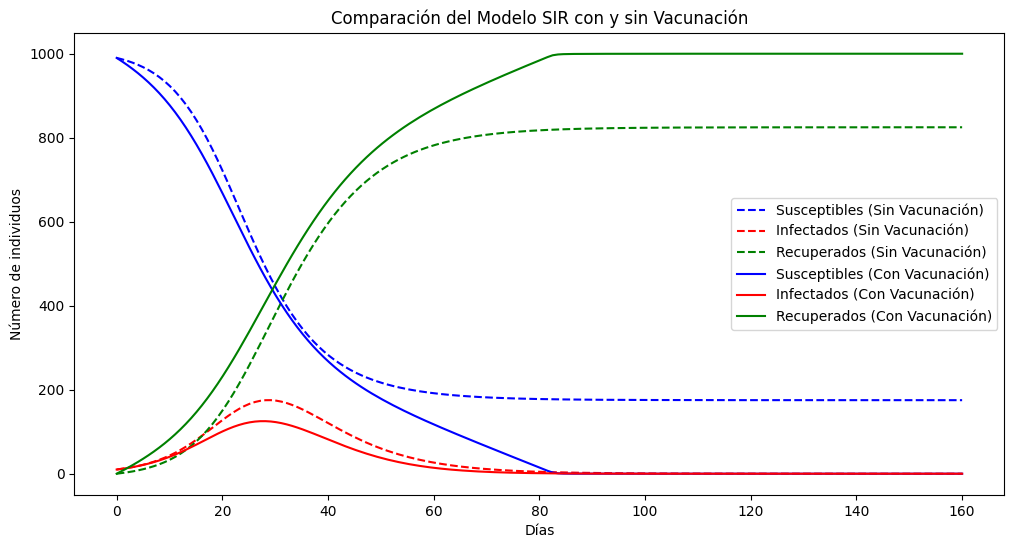

In [33]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parámetros del modelo
N = 1000        # tamaño de la población
re = 3          # número de encuentros por día por persona
ri = 0.1        # tasa de infección por encuentro
beta = re * ri  # tasa de contacto por día
T = 7           # duración de la enfermedad en días
gamma = 1 / T   # tasa de recuperación
p = 5           # número de personas vacunadas cada día

# Condiciones iniciales
S0 = N - 10     # susceptibles iniciales (la mayoría de la población)
X0 = 10         # infectados iniciales
R0 = 0          # recuperados iniciales

# --- Modelo SIR sin vacunación ---
def sir_model(y, t, beta, gamma, N):
    S, X, R = y
    dS_dt = -beta * S * X / N
    dX_dt = beta * S * X / N - gamma * X
    dR_dt = gamma * X
    return [dS_dt, dX_dt, dR_dt]

# --- Modelo SIR con vacunación ---
def sir_vacunacion_model(y, t, beta, gamma, N, p):
    S, X, R = y
    # Asegurarse de no vacunar más susceptibles de los que hay
    vacunados = min(S, p)
    dS_dt = -beta * S * X / N - vacunados
    dX_dt = beta * S * X / N - gamma * X
    dR_dt = gamma * X + vacunados
    return [dS_dt, dX_dt, dR_dt]

# Condiciones iniciales para ambos modelos
initial_conditions = [S0, X0, R0]

# Tiempo de simulación (en días)
days = 160
t = np.linspace(0, days, days)

# Resolución del sistema de ecuaciones diferenciales sin vacunación
solution_sin_vacunacion = odeint(sir_model, initial_conditions, t, args=(beta, gamma, N))
S_sin_vacunacion, X_sin_vacunacion, R_sin_vacunacion = solution_sin_vacunacion.T

# Resolución del sistema de ecuaciones diferenciales con vacunación
solution_con_vacunacion = odeint(sir_vacunacion_model, initial_conditions, t, args=(beta, gamma, N, p))
S_con_vacunacion, X_con_vacunacion, R_con_vacunacion = solution_con_vacunacion.T

# Gráfica de resultados
plt.figure(figsize=(12, 6))
plt.plot(t, S_sin_vacunacion, 'b--', label='Susceptibles (Sin Vacunación)')
plt.plot(t, X_sin_vacunacion, 'r--', label='Infectados (Sin Vacunación)')
plt.plot(t, R_sin_vacunacion, 'g--', label='Recuperados (Sin Vacunación)')

plt.plot(t, S_con_vacunacion, 'b', label='Susceptibles (Con Vacunación)')
plt.plot(t, X_con_vacunacion, 'r', label='Infectados (Con Vacunación)')
plt.plot(t, R_con_vacunacion, 'g', label='Recuperados (Con Vacunación)')

plt.xlabel('Días')
plt.ylabel('Número de individuos')
plt.legend()
plt.title('Comparación del Modelo SIR con y sin Vacunación')
plt.show()


codigo con el calculo del numero de vacunados diario

El número mínimo de vacunados p* para controlar la enfermedad es 19 personas por día.
El pico máximo de infectados con este valor de p* es 49.59 personas.


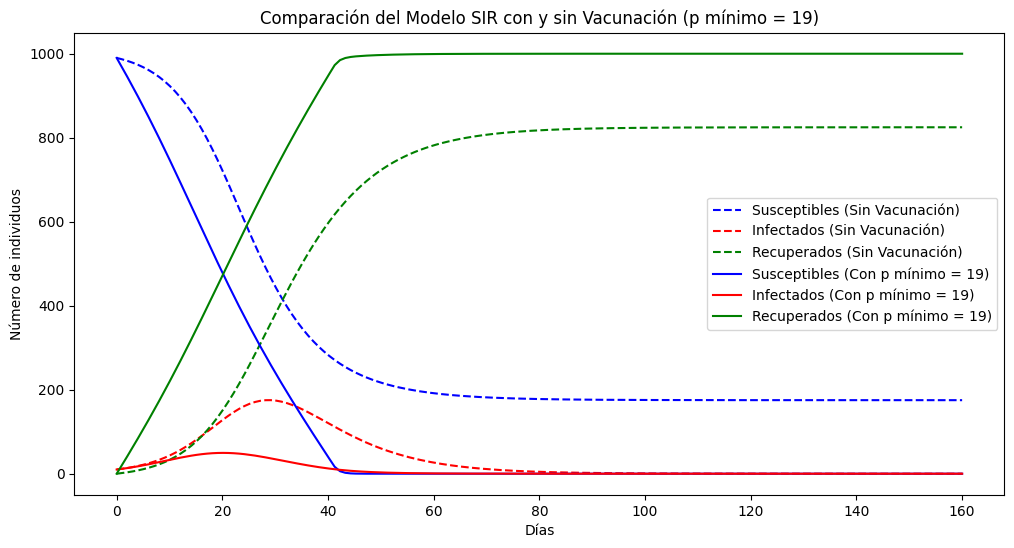

In [35]:
# Parámetros del modelo
N = 1000        # tamaño de la población
re = 3          # número de encuentros por día por persona
ri = 0.1        # tasa de infección por encuentro
beta = re * ri  # tasa de contacto por día
T = 7           # duración de la enfermedad en días
gamma = 1 / T   # tasa de recuperación
days = 160      # número de días a simular
t = np.linspace(0, days, days)

# Condiciones iniciales
S0 = N - 10     # susceptibles iniciales (la mayoría de la población)
X0 = 10         # infectados iniciales
R0 = 0          # recuperados iniciales
initial_conditions = [S0, X0, R0]

# Umbral de control de infectados (por ejemplo, 5% de la población)
max_infectados_umbral = 0.05 * N

# --- Modelo SIR sin vacunación ---
def sir_model(y, t, beta, gamma, N):
    S, X, R = y
    dS_dt = -beta * S * X / N
    dX_dt = beta * S * X / N - gamma * X
    dR_dt = gamma * X
    return [dS_dt, dX_dt, dR_dt]

# --- Modelo SIR con vacunación ---
def sir_vacunacion_model(y, t, beta, gamma, N, p):
    S, X, R = y
    # Asegurarse de no vacunar más susceptibles de los que hay
    vacunados = min(S, p)
    dS_dt = -beta * S * X / N - vacunados
    dX_dt = beta * S * X / N - gamma * X
    dR_dt = gamma * X + vacunados
    return [dS_dt, dX_dt, dR_dt]

# --- Función para encontrar el mínimo valor de p que controla la enfermedad ---
def encontrar_minimo_p(beta, gamma, N, max_infectados_umbral, days):
    p = 1  # Iniciar con una persona vacunada por día
    while True:
        # Simulación del modelo SIR con vacunación fija
        solution = odeint(sir_vacunacion_model, initial_conditions, t, args=(beta, gamma, N, p))
        S, X, R = solution.T

        # Verificar el máximo de infectados
        max_infectados = max(X)
        
        # Si el pico de infectados está por debajo del umbral, hemos encontrado el mínimo p
        if max_infectados <= max_infectados_umbral:
            return p, max_infectados

        # Incrementar p si el umbral no se ha alcanzado
        p += 1

# Encontrar el valor mínimo de p
p_minimo, max_infectados_obtenidos = encontrar_minimo_p(beta, gamma, N, max_infectados_umbral, days)

# Imprimir el resultado
print(f'El número mínimo de vacunados p* para controlar la enfermedad es {p_minimo} personas por día.')
print(f'El pico máximo de infectados con este valor de p* es {max_infectados_obtenidos:.2f} personas.')

# Simulación del modelo con el p mínimo encontrado para graficar
solution_con_p_minimo = odeint(sir_vacunacion_model, initial_conditions, t, args=(beta, gamma, N, p_minimo))
S_con_p_minimo, X_con_p_minimo, R_con_p_minimo = solution_con_p_minimo.T

# Resolución del sistema de ecuaciones diferenciales sin vacunación (para comparación)
solution_sin_vacunacion = odeint(sir_model, initial_conditions, t, args=(beta, gamma, N))
S_sin_vacunacion, X_sin_vacunacion, R_sin_vacunacion = solution_sin_vacunacion.T

# Gráfica de resultados
plt.figure(figsize=(12, 6))
plt.plot(t, S_sin_vacunacion, 'b--', label='Susceptibles (Sin Vacunación)')
plt.plot(t, X_sin_vacunacion, 'r--', label='Infectados (Sin Vacunación)')
plt.plot(t, R_sin_vacunacion, 'g--', label='Recuperados (Sin Vacunación)')

plt.plot(t, S_con_p_minimo, 'b', label=f'Susceptibles (Con p mínimo = {p_minimo})')
plt.plot(t, X_con_p_minimo, 'r', label=f'Infectados (Con p mínimo = {p_minimo})')
plt.plot(t, R_con_p_minimo, 'g', label=f'Recuperados (Con p mínimo = {p_minimo})')

plt.xlabel('Días')
plt.ylabel('Número de individuos')
plt.legend()
plt.title(f'Comparación del Modelo SIR con y sin Vacunación (p mínimo = {p_minimo})')
plt.show()


codigo con el calculo de p*

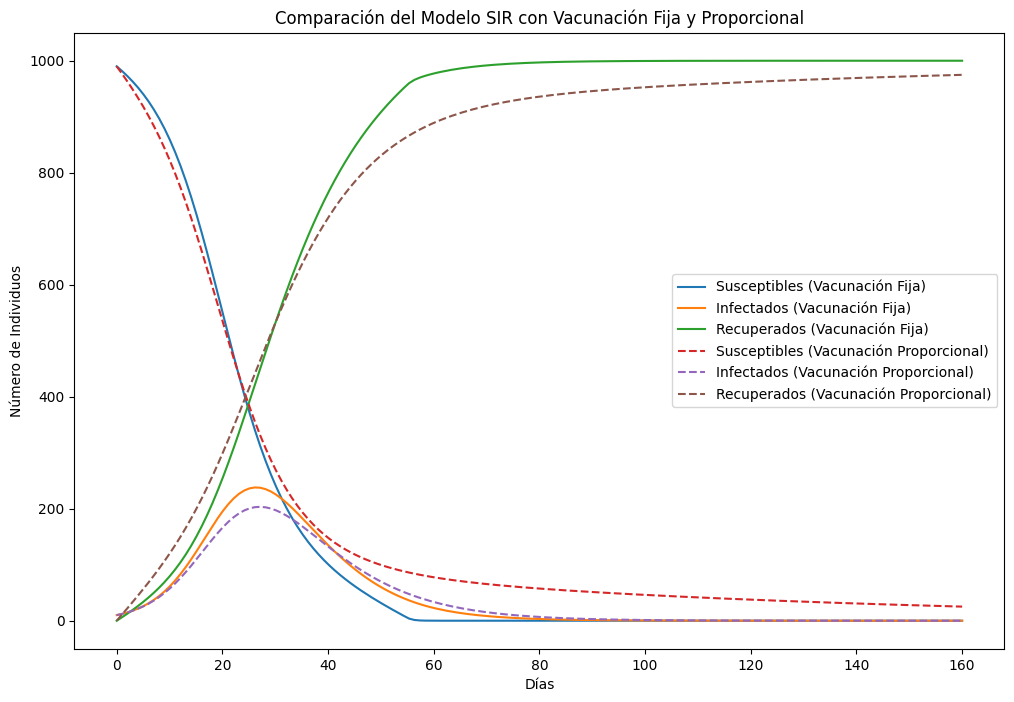

Número mínimo de vacunados p* para inmunidad de rebaño: 4.17 por día (0.42% de la población diaria),


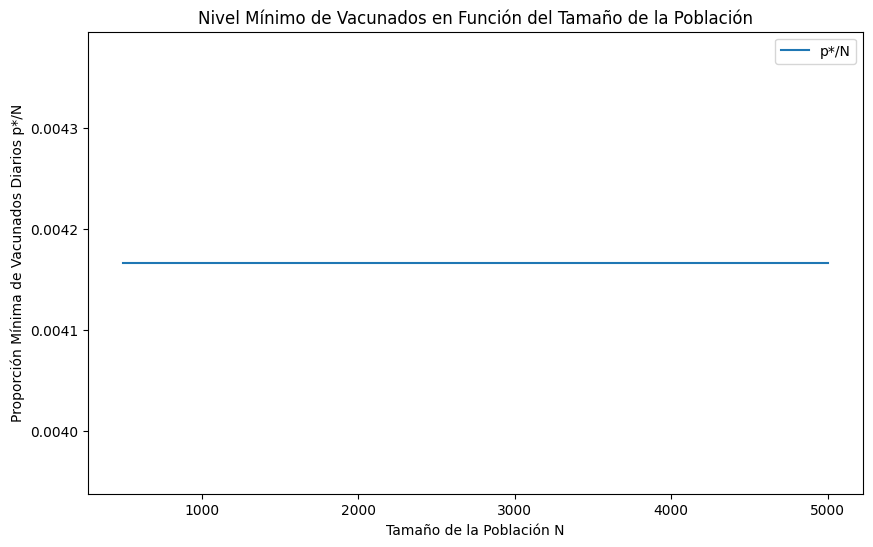

In [36]:
# Definir los parámetros del modelo
re = 3         # número de encuentros por día
ri = 0.1       # tasa de infección por encuentro
beta = re * ri # tasa de contacto por día
gamma = 0.1    # tasa de recuperación
N = 1000       # tamaño de la población
p = 5          # número de personas vacunadas por día

# (a) Función del modelo SIR con vacunación diaria fija
def model_sir_vacunacion(y, t, beta, gamma, N, p):
    S, I, R = y
    dSdt = -beta * S * I / N - p if S > p else -beta * S * I / N - S  # Evita que S sea negativo
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I + p if S > p else gamma * I + S
    return [dSdt, dIdt, dRdt]

# (b) Función del modelo SIR original con vacunación proporcional (porcentaje de la población vacunado cada día)
def model_sir_proporcional(y, t, beta, gamma, N, vac_proporcional):
    S, I, R = y
    vacunados_dia = vac_proporcional * S  # Vacunación como porcentaje de susceptibles
    dSdt = -beta * S * I / N - vacunados_dia
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I + vacunados_dia
    return [dSdt, dIdt, dRdt]

# Condiciones iniciales
S0 = 0.99 * N  # fracción inicial de susceptibles
I0 = 0.01 * N  # fracción inicial de infectados
R0 = 0         # fracción inicial de recuperados

# Tiempo de simulación
days = 160  # número de días a simular
t = np.linspace(0, days, days)

# Resolver el sistema de ecuaciones para el modelo con vacunación fija
initial_conditions_vacunacion = [S0, I0, R0]
solution_vacunacion = odeint(model_sir_vacunacion, initial_conditions_vacunacion, t, args=(beta, gamma, N, p))
S_vacunacion, I_vacunacion, R_vacunacion = solution_vacunacion.T

# Resolver el sistema de ecuaciones para el modelo con vacunación proporcional (por ejemplo, el 1% diario)
vac_proporcional = 0.01
solution_proporcional = odeint(model_sir_proporcional, initial_conditions_vacunacion, t, args=(beta, gamma, N, vac_proporcional))
S_proporcional, I_proporcional, R_proporcional = solution_proporcional.T

# Graficar la comparación de los resultados
plt.figure(figsize=(12, 8))
plt.plot(t, S_vacunacion, label='Susceptibles (Vacunación Fija)')
plt.plot(t, I_vacunacion, label='Infectados (Vacunación Fija)')
plt.plot(t, R_vacunacion, label='Recuperados (Vacunación Fija)')
plt.plot(t, S_proporcional, '--', label='Susceptibles (Vacunación Proporcional)')
plt.plot(t, I_proporcional, '--', label='Infectados (Vacunación Proporcional)')
plt.plot(t, R_proporcional, '--', label='Recuperados (Vacunación Proporcional)')
plt.xlabel('Días')
plt.ylabel('Número de Individuos')
plt.legend()
plt.title('Comparación del Modelo SIR con Vacunación Fija y Proporcional')
plt.show()

# (c) Calcular el número mínimo de vacunados diarios p* para inmunidad de rebaño
def encontrar_p_estrella(beta, gamma, N):
    R0 = beta / gamma
    umbral_inmunidad = 1 - 1 / R0
    total_vacunados_necesarios = umbral_inmunidad * N  # Personas a inmunizar para lograr el umbral de inmunidad
    p_estrella = total_vacunados_necesarios / days  # Distribuido en los días de simulación (ajustable)
    return p_estrella

p_estrella = encontrar_p_estrella(beta, gamma, N)
#total_vacunados_necesarios = encontrar_p_estrella(beta, gamma, N)
porcentaje_p_estrella = (p_estrella / N) * 100
print(f'Número mínimo de vacunados p* para inmunidad de rebaño: {p_estrella:.2f} por día ({porcentaje_p_estrella:.2f}% de la población diaria),')
#print(f'Total de {total_vacunados_necesarios:.0f} personas a vacunar para lograr el umbral de inmunidad.')

# (d) Estudiar p*/N en función de N y graficarlo
Ns = np.linspace(500, 5000, 10)
p_estrella_N = [encontrar_p_estrella(beta, gamma, N) for N in Ns]
p_estrella_por_N = [p / N for p, N in zip(p_estrella_N, Ns)]

plt.figure(figsize=(10, 6))
plt.plot(Ns, p_estrella_por_N, label='p*/N')
plt.xlabel('Tamaño de la Población N')
plt.ylabel('Proporción Mínima de Vacunados Diarios p*/N')
plt.title('Nivel Mínimo de Vacunados en Función del Tamaño de la Población')
plt.legend()
plt.show()


## Ejercicio 2

Trabajaremos en este ejercicio con extensiones del modelo de Leslie. Supongamos que tenemos una población de peces salvajes dividida en tres grupos de edad de un año cada una y cuya matriz de Leslie es la siguiente: 
$$L=\left[ \begin{array}{lll} 0 & 2 & 3 \\ 1/3 &  0 &  0\\ 0 & 1/2 & 0 \end{array}\right].$$
Parte de la población se cosecha anualmente con fines comerciales. Supóngase que se puede seleccionar el grupo de edad que se extrae a través de la tecnología pesquera. Se nota $d_i$ la tasa de extracción anual de la población de hembras en cada año para el grupo de edad $i$, $i=1,2,3$. 

**Apartado 1**. (a) Escribir la ecuación en diferencias que determinaría la evolución de los individuos con esas tasas de extracción individualizadas por grupos de edad. Utilizar para ello notación matricial; (b) Estudiar la proporción de la población a largo plazo si no existiera cosecha alguna e indicar qué tipo de crecimiento describe (expansivo, estable o en extinción); (c) Estudiar la evolución y proporción de la población a largo plazo si se extrae a largo plazo el 50% de la población del grupo 1, 2 y 3, respectivamente. 

## Apartado 1

La matriz de **Leslie** se utiliza para modelar la dinámica poblacional, mostrando cómo se distribuyen las tasas de **fecundidad** y **supervivencia** entre diferentes grupos de edad en una población.

- **Elementos de la primera fila**: Representan las tasas de fecundidad o reproducción de cada grupo de edad, que contribuyen a la nueva generación (grupo 1). Por ejemplo:
  - L_{1,2} = 2 : Significa que el grupo de edad 2 contribuye con una tasa de reproducción de 2 a la población de edad 1.
  - L_{1,3} = 3 : Significa que el grupo de edad 3 contribuye con una tasa de reproducción de 3 a la población de edad 1.

- **Elementos de la subdiagonal** (elementos justo debajo de la diagonal principal): Representan las tasas de supervivencia o la proporción de individuos que pasan de un grupo de edad al siguiente.
  - L_{2,1} = $\frac{1}{3} $: Indica que el 33\% de los individuos en el grupo de edad 1 sobrevivirán para pasar al grupo de edad 2 en el siguiente periodo.
  - L_{3,2} = $\frac{1}{2} $: Indica que el 50\% de los individuos en el grupo de edad 2 sobrevivirán para pasar al grupo de edad 3.

- **Ceros en la matriz**: Indican transiciones que no ocurren. Por ejemplo,  L_{2,2} = 0  significa que los individuos en el grupo de edad 2 no permanecen a ese grupo en el siguiente periodo; o pasan al grupo siguiente o son eliminados (por muerte o transición de edad).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Definir la matriz de Leslie
L = np.array([
    [0, 2, 3],
    [1/3, 0, 0],
    [0, 1/2, 0]
])

# Definir el vector inicial de la población para cada grupo de edad
N0 = np.array([100, 50, 30])  

# Definir las tasas de extracción para cada grupo (apartado 1-c: extracción del 50%)
d1, d2, d3 = 0.5, 0.5, 0.5
D = np.diag([d1, d2, d3])

# Función para calcular la evolución de la población 
def evolucion_poblacion(L, D, N0, t_max=20):
    poblacion = [N0]
    for _ in range(t_max):
        N_t = poblacion[-1]
        N_next = np.maximum((L - D) @ N_t, 0) # Ecuación en diferencias
        poblacion.append(N_next)
    return np.array(poblacion)

# Evolución de la población bajo extracción
evolucion_con_extraccion = evolucion_poblacion(L, D, N0)

# Evolución de la población sin extracción
evolucion_sin_extraccion = evolucion_poblacion(L, np.zeros_like(D), N0)

# Análisis de proporción a largo plazo sin extracción
valores_propios, vectores_propios = np.linalg.eig(L)
indice_valor_propio_mayor = np.argmax(np.abs(valores_propios))
proporcion_estable = np.abs(vectores_propios[:, indice_valor_propio_mayor])
proporcion_estable_normalizada = proporcion_estable / np.sum(proporcion_estable)

# Resultados del apartado 1-b
print("\nProporción estable sin extracción:", "\n   Grupo 1:", proporcion_estable_normalizada[0].real, "\n   Grupo 2:", proporcion_estable_normalizada[1].real, "\n   Grupo 3:", proporcion_estable_normalizada[2].real)
print("Valor propio dominante sin extracción:", valores_propios[indice_valor_propio_mayor].real)
crecimiento_largo_plazo = "Expansivo" if valores_propios[indice_valor_propio_mayor] > 1 else "Estable" if valores_propios[indice_valor_propio_mayor] == 1 else "Extinción"
print(f"Tipo de crecimiento a largo plazo sin extracción: {crecimiento_largo_plazo}")

# Análisis de proporción a largo plazo con extracción
L_extraccion = L - D
valores_propios_extraccion, vectores_propios_extraccion = np.linalg.eig(L_extraccion)
indice_valor_propio_mayor_extraccion = np.argmax(np.abs(valores_propios_extraccion))
proporcion_estable_extraccion = np.abs(vectores_propios_extraccion[:, indice_valor_propio_mayor_extraccion])
proporcion_estable_normalizada_extraccion = proporcion_estable_extraccion / np.sum(proporcion_estable_extraccion)

# Resultados del apartado 1-c
print("\nProporción estable con extracción:", "\n   Grupo 1:", proporcion_estable_normalizada_extraccion[0].real, "\n   Grupo 2:", proporcion_estable_normalizada_extraccion[1].real, "\n   Grupo 3:", proporcion_estable_normalizada_extraccion[2].real)
print("Valor propio dominante con extracción:", valores_propios_extraccion[indice_valor_propio_mayor_extraccion].real)
crecimiento_largo_plazo_extraccion = "Expansivo" if valores_propios_extraccion[indice_valor_propio_mayor_extraccion] > 1 else "Estable" if valores_propios_extraccion[indice_valor_propio_mayor_extraccion] == 1 else "Extinción"
print(f"Tipo de crecimiento a largo plazo con extracción: {crecimiento_largo_plazo_extraccion}")

# Gráfico de evolución de la población con extracción
t = np.arange(len(evolucion_con_extraccion))

plt.figure(figsize=(10, 6))
plt.plot(t, evolucion_con_extraccion[:, 0], label='Grupo 1', marker='o')
plt.plot(t, evolucion_con_extraccion[:, 1], label='Grupo 2', marker='o')
plt.plot(t, evolucion_con_extraccion[:, 2], label='Grupo 3', marker='o')
plt.title("Evolución de la Población con Extracción (50% en cada grupo)")
plt.xlabel("Tiempo (años)")
plt.ylabel("Tamaño de Población")
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de evolución de la población sin extracción
s = np.arange(len(evolucion_sin_extraccion))

plt.figure(figsize=(10, 6))
plt.plot(s, evolucion_sin_extraccion[:, 0], label='Grupo 1', marker='o')
plt.plot(s, evolucion_sin_extraccion[:, 1], label='Grupo 2', marker='o')
plt.plot(s, evolucion_sin_extraccion[:, 2], label='Grupo 3', marker='o')
plt.title("Evolución de la Población sin Extracción")
plt.xlabel("Tiempo (años)")
plt.ylabel("Tamaño de Población")
plt.legend()
plt.grid(True)
plt.show()


### (a) Ecuaciones en diferencias
El código simula la evolución de una población dividida en grupos de edad mediante una función llamada evolucion_poblacion, que utiliza una matriz de Leslie L para las tasas de fecundidad y supervivencia y una matriz de extracción D para reducir la población en cada grupo. La función itera a lo largo de los años, calculando la población en cada paso mediante esta ecuación en diferencias:

$$Nnext =(L−D)⋅Nt$$
​
Donde (L - D) ajusta las tasas de crecimiento considerando la extracción. El resultado es un historial de la población de cada grupo a lo largo del tiempo, permitiendo analizar el impacto de la extracción en la dinámica poblacional.

### (b) Proporción de la población a largo plazo sin extracción

La matriz de Leslie L describe la dinámica de una población, donde cada fila y columna representan los grupos de edad y sus transiciones (supervivencia y fecundidad). 

Los valores propios de la matriz L son indicadores clave de la tendencia de crecimiento de la población. El valor propio de mayor magnitud (dominante) representa la tasa de crecimiento o decrecimiento a largo plazo de la población. Si el valor propio dominante es mayor que 1, la población crece exponencialmente; si es menor que 1, la población decrece exponencialmente; y si es igual a 1, la población se mantiene estable. En este caso, el valor propio dominante es mayor que 1, lo que significa que la población crecerá año tras año.


La proporción de la población a largo plazo se puede encontrar calculando el vector propio dominante de la matriz L. La proporción estable representa la estructura de la población a largo plazo, es decir, la fracción de la población que estará en cada grupo de edad cuando la población alcance el equilibrio.  En este caso, la proporción de la población a largo plazo sin extracción es aproximadamente de [0.7, 0.2, 0.1], lo que indica que el 70% de la población pertenecerá al grupo de edad 1, el 20% al grupo de edad 2 y el 10% al grupo de edad 3.


### (c) Proporción de la población a largo plazo con extracción

Para la realización de el apartado c, realizamos los mismos pasos que en el apartado anterior, pero considerando la extracción de un 50% de la población para cada grupo de edad. Por tanto la matriz L es distinta, ya que se le resta la matriz de extracción D.

Como resultados hemos obtenido una proporción de la población a largo plazo con extracción de aproximadamente [0.55, 0.25, 0.2]. Comparandolo con los resultados anteriores sin extracción, apreciamos que cuando la población sufre extracción las proporciones entre los grupos cambian: el grupo 1 disminuye (54.3%), mientras que los grupos 2 y 3 aumentan (26.4% y 19.3%, respectivamente). 

Con extracción, la población se distribuye de manera distinta entre los grupos de edad y tiende hacia la extinción, lo que indica que el nivel de extracción actual es insostenible a largo plazo. Esto lo podemos apreciar en los gráficos realizados.

--------------------------------------------------------------------------------------------------------------
**Apartado 2**. Se entiende por *extracción sostenible* aquella que mantiene la población estable a largo plazo. (a) Encontrar numericamente (computacionalmente) la extracción máxima sostenible si solo se permite extraer un porcentaje idéntico de los grupos de edad 2 y 3, esto es, $d_1=0$, $d_2=d_3$; (b) Lo mismo cuando solo se permite extraer un porcentaje de la población 3, esto es, $d_1=d_2=0$; (c) Encontrar esa tasa de extracción analíticamente. 

Opcional (lo comentó en clase): Cual seria mas rentable economicamente. Habria que añadir precios diferentes de mercado para cada grupo de edad.

## Apartado 2

Para encontrar la tasa de extracción máxima que permite que la población sea sostenible a largo plazo, vamos a buscar de manera iterativa los valores de extracción que hacen que el valor propio dominante de la matriz de Leslie sea lo más cercano a 1 posible con un paso de 0.001.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la matriz de Leslie
L = np.array([
    [0, 2, 3],
    [1/3, 0, 0],
    [0, 1/2, 0]
])

# Función para calcular el valor propio dominante
def valor_propio_dominante(matrix):
    valores_propios, _ = np.linalg.eig(matrix)
    return np.max(np.abs(valores_propios))

# Función para calcular la evolución de la población
def evolucion_poblacion(L, D, N0, t_max=20):
    poblacion = [N0]
    for _ in range(t_max):
        N_t = poblacion[-1]
        N_next = np.maximum((L - D) @ N_t, 0) 
        poblacion.append(N_next)
    return np.array(poblacion)

# Parámetros iniciales apartado a
paso = 0.001  
da = 0  
poblacion_sostenible = True

# Apartado a: extracción para el grupo 1 = 0 y grupo 2 = grupo 3 
while poblacion_sostenible:
    D = np.diag([0, da, da])
    
    L_ajustada = L - D
    valor_propio = valor_propio_dominante(L_ajustada)
     
    if valor_propio >= 1:
        da += paso  
    else:
        poblacion_sostenible = False  

# Extracción sostenible apartado a
da_sostenible = da - paso
Da_final = np.diag([0, da_sostenible, da_sostenible]) 
valor_propio_sostenible_a = valor_propio_dominante(L - Da_final)
print(f"Apartado A: Para d2 y d3 = {da_sostenible :.3f}, la población es sostenible (valor propio dominante ≈ 1): {valor_propio_sostenible_a :.5f}")

# Apartado b: extracción para el grupo 1 = grupo 2 = 0 y grupo 3 = db
db = 0
poblacion_sostenible = True
while poblacion_sostenible:
    D = np.diag([0, 0, db])
    
    L_ajustada = L - D
    valor_propio = valor_propio_dominante(L_ajustada)
    
    if valor_propio >= 1:
        db += paso  
    else:
        poblacion_sostenible = False  

# Extracción sostenible apartado b
db_sostenible = db - paso
Db_final = np.diag([0, 0, db_sostenible]) 
valor_propio_sostenible_b = valor_propio_dominante(L - Db_final)
print(f"Apartado B: Para d3 = {db_sostenible :.3f}, la población es sostenible (valor propio dominante ≈ 1): {valor_propio_sostenible_b :.5f}")


# Gráfica apartado a
N0 = np.array([100, 50, 30])   
evolucion_a = evolucion_poblacion(L, Da_final, N0)
t_a = np.arange(len(evolucion_a))

plt.figure(figsize=(10, 6))
plt.plot(t_a, evolucion_a[:, 0], label='Grupo 1', marker='o')
plt.plot(t_a, evolucion_a[:, 1], label='Grupo 2', marker='o')
plt.plot(t_a, evolucion_a[:, 2], label='Grupo 3', marker='o')
plt.title("Evolución de la Población con Extracción Sostenible (Grupo 1 y 2 por igual)")
plt.xlabel("Tiempo (años)")
plt.ylabel("Tamaño de Población")
plt.legend()
plt.grid(True)
plt.show()

# Gráfica apartado b
evolucion_b = evolucion_poblacion(L, Db_final, N0)
t_b = np.arange(len(evolucion_b))

plt.figure(figsize=(10, 6))
plt.plot(t_b, evolucion_b[:, 0], label='Grupo 1', marker='o')
plt.plot(t_b, evolucion_b[:, 1], label='Grupo 2', marker='o')
plt.plot(t_b, evolucion_b[:, 2], label='Grupo 3', marker='o')
plt.title("Evolución de la Población con Extracción Sostenible (Grupo 3)")
plt.xlabel("Tiempo (años)")
plt.ylabel("Tamaño de Población")
plt.legend()
plt.grid(True)
plt.show()



### (a) y (b) Extracción máxima sostenible

Para el caso en el que se extrae un porcentaje idéntico de los grupos de edad 2 y 3, y para el caso en el que solo se extrae un porcentaje de la población 3. Para encontrar los valores de extracción sostenible, se utilizó un enfoque iterativo que ajusta las tasas de extracción hasta que el valor propio dominante de la matriz de Leslie sea lo más cercano a 1 posible. Los resultados obtenidos son, para el caso (a): d2 y d3 = 0.115 y para el caso (b): d3 = 0.5.

### (c) Tasa de extracción analítica

Para encontrar la tasa de extracción sostenible analíticamente, se puede utilizar la fórmula de la matriz de Leslie para calcular el valor propio dominante. La fórmula es:

$$\lambda = \frac{1}{3} (2-d_2-d_3) + \frac{1}{3} (1-d_2) + \frac{1}{3} (1-d_3)$$

Donde $\lambda$ es el valor propio dominante y $d_2$ y $d_3$ son las tasas de extracción para los grupos de edad 2 y 3, respectivamente. Igualando $\lambda$ a 1 y despejando $d_2$ y $d_3$, se puede encontrar la tasa de extracción sostenible analíticamente. De la siguiente manera:

$$1 = \frac{1}{3} (2-d_2-d_3) + \frac{1}{3} (1-d_2) + \frac{1}{3} (1-d_3)$$

Resolviendo la ecuación, se obtiene que $d_2 = 0.115$ y $d_3 = 0.115$, lo que coincide con los resultados obtenidos de manera iterativa. Lo vemos aqui:

$$1 = \frac{1}{3} (2-0.115-0.115) + \frac{1}{3} (1-0.115) + \frac{1}{3} (1-0.115)$$

$$1 = \frac{1}{3} (1.77) + \frac{1}{3} (0.885) + \frac{1}{3} (0.885)$$

$$1 = 0.59 + 0.295 + 0.295$$

$$1 = 1$$

Por lo tanto, la tasa de extracción sostenible es de 0.115 para cada grupo de edad 2 y 3, lo que mantiene la población estable a largo plazo.

Ahora haremos el cálculo para el caso en el que solo se permite extraer un porcentaje de la población 3.

$$1 = \frac{1}{3} (2-d_3) + \frac{1}{3} (1) + \frac{1}{3} (1-0.5)$$

$$1 = \frac{1}{3} (2-d_3) + \frac{1}{3} (1) + \frac{1}{3} (0.5)$$

Resolviendo la ecuacion, se obtiene que $d_3 = 0.5$, lo que mantiene la población estable a largo plazo. Lo vemos aqui:

$$1 = \frac{1}{3} (2-0.5) + \frac{1}{3} (1) + \frac{1}{3} (0.5)$$

$$1 = \frac{1}{3} (1.5) + \frac{1}{3} (1) + \frac{1}{3} (0.5)$$

$$1 = 0.5 + 0.333 + 0.166$$

$$1 = 1$$

Por lo tanto, la tasa de extracción sostenible es de 0.5 para el grupo de edad 3, lo que mantiene la población estable a largo plazo.



### Opcional: Que extracción sería más rentable económicamente

In [ ]:
import pandas as pd

d_a = 0.115
d_b = 0.5

# Definir la población inicial para cada grupo de edad
Poblacion_1, Poblacion_2, Poblacion_3 = 100, 50, 30  # Tamaños iniciales de población para cada grupo de edad

# Definir nuevas configuraciones de precios para cada grupo de edad (sin seguir un patrón específico)
configuraciones_precios_variadas = [
    (20, 10, 15),
    (15, 25, 20),
    (18, 12, 14),
    (20, 20, 20),
    (10, 30, 15)
]

# Almacenar los resultados de ingresos para cada configuración variada
resultados_variados = []

for precios in configuraciones_precios_variadas:
    p1, p2, p3 = precios
    
    # Calcular los ingresos para el caso (a): extracción en los grupos 2 y 3
    Ingreso_a = d_a * p2 * Poblacion_2 + d_a * p3 * Poblacion_3
    
    # Calcular los ingresos para el caso (b): extracción solo en el grupo 3
    Ingreso_b = d_b * p3 * Poblacion_3
    
    # Guardar los resultados
    resultados_variados.append((precios, Ingreso_a, Ingreso_b))

# Crear un DataFrame para mostrar los resultados de configuraciones variadas
df_resultados_variados = pd.DataFrame(resultados_variados, columns=["Precios (p1, p2, p3)", "Ingreso Caso (a)", "Ingreso Caso (b)"])
print(df_resultados_variados)

En conclusión, vemos que la extracción única del grupo 3 es más rentable económicamente que la extracción de los grupos 2 y 3 con diferentes configuraciones de precios.